In [ ]:
try:
    from google.colab import files
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:    
    !pip install wandb
    !pip install kaggle
    !pip install -q  --no-deps tensorflow-addons~=0.6

In [ ]:
if IN_COLAB:
    !git clone https://github.com/JoaoMarcosCSilva/Adversarial-Mixup-Resynthesis.git

In [ ]:
if IN_COLAB:
    %tensorflow_version 2.x
    %cd Adversarial-Mixup-Resynthesis 

%load_ext autoreload
%autoreload 2

import wandb
import matplotlib.pyplot as plt
import numpy as np
from lib import data, model, losses, ae_gan, baseline, visualize
from tensorflow import keras

In [ ]:
if IN_COLAB:
    !wandb login #9b9824d4cef0c25bf0df0c1c1dec479661637265

In [ ]:
# Upload kaggle.json
if IN_COLAB:
    from google.colab import files
    files.upload()
    data.download_data('kaggle.json')

In [9]:
x_train, x_test = data.load_data()

In [ ]:
if IN_COLAB:
    !git pull

In [84]:
Type = 'AE-GAN'

Model_Layers = 3
Model_Hidden_Size = 40
Model_Starting_Channels = 64
Model_LR = 0.001

Discriminator_Layers = 4
Discriminator_Starting_Channels = 32
Discriminator_LR = 0.0025

Train_Discriminator_Every = 1

Lambda = 9
Batch_Size = 32

Epochs = 20

Spectral_Norm = False
Instance_Norm = False

In [85]:
Encoder, Decoder, Model = model.get_Model(Model_Layers, Model_Hidden_Size, Model_Starting_Channels, Instance_Norm)
Disc = model.get_Discriminator(Discriminator_Layers, Discriminator_Starting_Channels, Spectral_Norm) 
if Type.lower() == 'baseline':
  Autoencoder = baseline.Autoencoder(Encoder, Decoder, Disc, keras.optimizers.Adam(Model_LR), keras.optimizers.Adam(Discriminator_LR))
elif Type.lower() == 'ae-gan':
  Autoencoder = ae_gan.Autoencoder(Encoder, Decoder, Disc, Lambda, keras.optimizers.Adam(Model_LR), keras.optimizers.Adam(Discriminator_LR))
x_data = data.get_tf_data(x_train, batch_size = Batch_Size)

Epoch: 1
33/33 [==============================] - 52s 2s/step - Autoencoder Loss: 7.4298 - Autoencoder Reconstruction Loss: 0.0853 - Discriminator Loss: 0.2060
C:\Users\joaom\.conda\envs\tensorflow\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Epoch: 1
33/33 [==============================] - 48s 1s/step - Autoencoder Loss: 2.0134 - Autoencoder Reconstruction Loss: 0.0910 - Discriminator Loss: 1.1803
Epoch: 1
14/33 [===========>..................] - ETA: 30s - Autoencoder Loss: 5.4640 - Autoencoder Reconstruction Loss: 0.1135 - Discriminator Loss: 0.2417

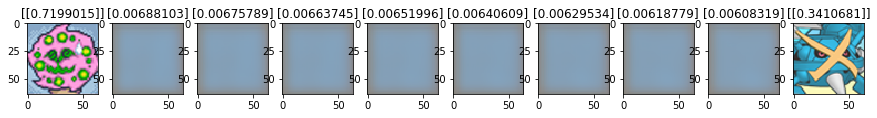

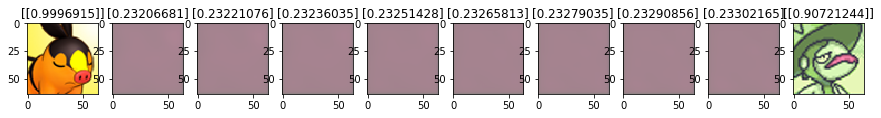

KeyboardInterrupt: 

In [86]:
for e in range(20):
    Autoencoder.train(1, x_data, log_wandb = False, plot_data = x_test, disc_steps = 3)
    visualize.get_output_image(Autoencoder, 1, 10, x_test, interpolate_images = False)

In [52]:
Autoencoder.evaluate(x_data)

<tf.Tensor: id=311970, shape=(), dtype=float32, numpy=0.022523202>

In [ ]:
run = wandb.init(project = 'pokemon-interpolator', config = {
  'Model_Layers' : Model_Layers,
  'Model_Hidden_Size':Model_Hidden_Size,
  'Model_Starting_Channels':Model_Starting_Channels,
  'Model_LR':Model_LR,
  
  'Type': Type,

  'Discriminator_Layers':Discriminator_Layers,
  'Discriminator_Starting_Channels':Discriminator_Starting_Channels,
  'Discriminator_LR':Discriminator_LR,
  'Train_Discriminator_Every':Train_Discriminator_Every,

  'Epochs':Epochs,
  'Batch_Size':Batch_Size,
  'Lambda':Lambda,

  ''
})

C:\Users\joaom\.conda\envs\tensorflow\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


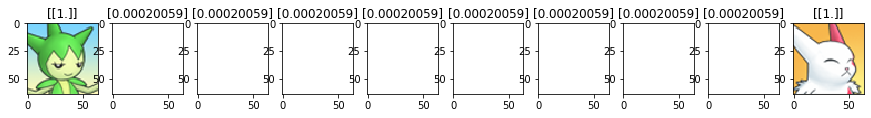

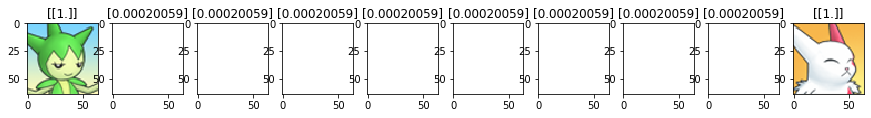

In [65]:
seed = np.random.randint(0,1000)
get_output_image(Autoencoder, 1, 10, x_test, seed = seed, interpolate_images = False)
get_output_image(Autoencoder, 1, 10, x_test, seed = seed, interpolate_images = True)

In [ ]:
visualize.get_output_image(Autoencoder,5,10,x_train, seed = 1, disc = True)